# Programming assignment 1: Visualizing COVID-19 data

## Disclaimer!!

##### - This is not an epidemiology study. It is simply a visualization exercise. Some epidemiology terms may not be correct. related to this [tweet.](https://twitter.com/tobiasgalla/status/1245612214632902656)
##### - ”Not enough testing was done in my country” is a true statement for every country/province/county/city. This is the data we have to work and infer some understanding of what’s happening. Data is always incomplete and inaccurate.
##### - Please use only the raw data I share. This makes marking consistent for the TAs. You can use more recent data to further customize your own dashboard outside this assignment.

# Geographic distribution of worldwide COVID-19 data

Your team wants to develop a dashboard to present daily visualizations of COVID-19 data collected from the [European Centre for Disease Prevention and Control.](https://www.ecdc.europa.eu/en/publications-data/download-todays-data-geographic-distribution-covid-19-cases-worldwide) Every day your team downloads the .xlsx file from the website, reads it, perform some transformations and produces several visualizations that are presented in the dashboard. 

Each row of the table contains the number of new cases and deaths reported per day and country. Every section below describes a specific task or visualization to perform.

# 2. Plot the cases: covid b cases cumulative analysis

Here, we start by replicating a very popular graph that appeared in early March in the
Financial Times. We will pick the N = 25 countries with the highest cumulative number of
confirmed cases and plot versus the number of days since the K = 100th case. Also, plot the
dashed lines that show the doubling of cases every 1, 2, 3 and 7 days.

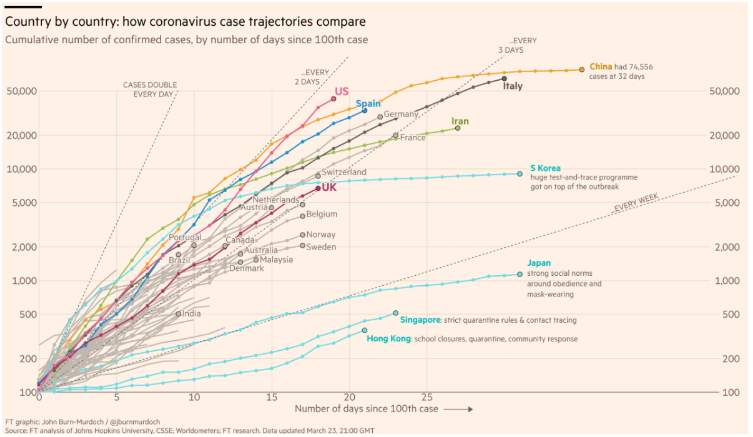

## 1. Import all the packages needed and load the file you created in the 1st part: (covid a master cumulative table).

## 2. Filter the last day for every country and create the pandas.DataFrame ’last day per country’.

In [1]:
import pandas as pd
import numpy as np
import glob
import os
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.dates as mdates
from scipy import stats
from adjustText import adjust_text
from matplotlib.ticker import ScalarFormatter

import warnings
warnings.filterwarnings('ignore')

In [2]:
cumalative_covid = pd.read_excel('Covid_A_Master_Cumalative_Table.xlsx')
cumalative_covid.drop(columns = ['Unnamed: 0'], inplace = True)
cumalative_covid

,Cases,Deaths,Date,Country,Population,Continent
0,0,0,2019-12-31,Afghanistan,38041757.0,Asia
1,0,0,2019-12-31,Algeria,43053054.0,Africa
2,0,0,2019-12-31,Armenia,2957728.0,Europe
3,0,0,2019-12-31,Australia,25203200.0,Oceania
4,0,0,2019-12-31,Austria,8858775.0,Europe
...,...,...,...,...,...,...
38906,1034,30,2020-08-27,Vietnam,96462108.0,Asia
38907,766,1,2020-08-27,Western_Sahara,582458.0,Africa
38908,1930,560,2020-08-27,Yemen,29161922.0,Asia
38909,11376,282,2020-08-27,Zambia,17861034.0,Africa


In [3]:
last_day_per_year = cumalative_covid.groupby(by = ['Country'])['Date'].max()
last_day_per_year = last_day_per_year.to_frame()
last_day_per_year.reset_index()

,Country,Date
0,Afghanistan,2020-08-27
1,Albania,2020-08-27
2,Algeria,2020-08-27
3,Andorra,2020-08-27
4,Angola,2020-08-27
...,...,...
205,Vietnam,2020-08-27
206,Western_Sahara,2020-08-27
207,Yemen,2020-08-27
208,Zambia,2020-08-27


## 3. Define the number of top countries you wish to plot (N = 25). Join with the dataframe ’covid cumulative’ with ’last day per country’ and sort the values of ’Cases’ in descending order. Slice the top N countries and convert the country names to a list.

In [4]:
last_day = pd.merge(cumalative_covid, last_day_per_year, how = 'inner', 
                    left_on = ['Country', 'Date'], right_on = ['Country', 'Date'])
last_day = last_day.sort_values(by = 'Cases', ascending = False)
last_day = last_day.reset_index()

In [5]:
N = 25
top_countries = last_day[:N]['Country'].to_list()
# top_countries

## 4. Filter rows in the dataframe ’covid cumulative’ that contain values of the top N countries and more than K = 100 confirmed cases.

In [6]:
K = 100
top_countries_covid = cumalative_covid[cumalative_covid.Country.isin(top_countries)]
top_countries_covid = top_countries_covid[top_countries_covid['Cases'] > K]
top_countries_covid

,Cases,Deaths,Date,Country,Population,Continent
3718,132,2,2020-02-24,Italy,60359546.0,Europe
3785,229,6,2020-02-25,Italy,60359546.0,Europe
3852,322,11,2020-02-26,Italy,60359546.0,Europe
3915,139,19,2020-02-27,Iran,82913893.0,Asia
3919,400,12,2020-02-27,Italy,60359546.0,Europe
...,...,...,...,...,...,...
38863,615701,13502,2020-08-27,S.Africa,58558267.0,Africa
38864,310836,3755,2020-08-27,S.Arabia,34268529.0,Asia
38894,262507,6183,2020-08-27,Turkey,82003882.0,Asia
38897,328846,41465,2020-08-27,UK,66647112.0,Europe


## 5. Create dataframe ’day 0 for every country’ that identifies Day 0 for each of the top N countries by applying groupby and min in the previously filtered dataframe.

In [7]:
day_0_for_every_country = top_countries_covid.groupby(by = ['Country']).min()
day_0_for_every_country = day_0_for_every_country['Date']
day_0_for_every_country.to_frame()

,Date
Country,
Argentina,2020-03-20
Bangladesh,2020-04-07
Brazil,2020-03-15
Canada,2020-03-12
Chile,2020-03-17
Colombia,2020-03-19
France,2020-03-02
Germany,2020-03-01
India,2020-03-17


## 6. Merge it back with the original dataframe ’covid top countries’ and subtract columns ’Date x’ and ’Day 0’ to calculate the ’Days from 0’.

In [8]:
top_countries_covid = top_countries_covid.merge(day_0_for_every_country, how = 'inner', on = 'Country')
top_countries_covid = top_countries_covid.rename(columns = {'Date_y': 'Date_0'})

In [9]:
top_countries_covid['Days from 0'] = (top_countries_covid['Date_x'] - top_countries_covid['Date_0']).dt.days
top_countries_covid

,Cases,Deaths,Date_x,Country,Population,Continent,Date_0,Days from 0
0,132,2,2020-02-24,Italy,60359546.0,Europe,2020-02-24,0
1,229,6,2020-02-25,Italy,60359546.0,Europe,2020-02-24,1
2,322,11,2020-02-26,Italy,60359546.0,Europe,2020-02-24,2
3,400,12,2020-02-27,Italy,60359546.0,Europe,2020-02-24,3
4,650,17,2020-02-28,Italy,60359546.0,Europe,2020-02-24,4
...,...,...,...,...,...,...,...,...
4176,292625,3907,2020-08-23,Bangladesh,163046173.0,Asia,2020-04-07,138
4177,294598,3941,2020-08-24,Bangladesh,163046173.0,Asia,2020-04-07,139
4178,297083,3983,2020-08-25,Bangladesh,163046173.0,Asia,2020-04-07,140
4179,299628,4028,2020-08-26,Bangladesh,163046173.0,Asia,2020-04-07,141


## 7. Generate the df ’max cases’ and save it as ’covid b max cases.xlsx’. This df is helpful in labeling the graphs and contains the snapshot of the countries with statistics such as: Case fatality rate, Infection rate per 1 million, Mortality rate per 1 million.

In [10]:
max_cases = top_countries_covid.groupby(by = 'Country').max()
max_cases['Case fatality rate'] = (max_cases['Deaths'] / max_cases['Cases']) * 100
max_cases['Infection rate per million'] = (max_cases['Cases'] / max_cases['Population']) * 1000000
max_cases['Mortality rate per million'] = (max_cases['Deaths'] / max_cases['Population']) * 1000000
max_cases = max_cases.sort_values('Cases', ascending = False)
max_cases

,Cases,Deaths,Date_x,Population,Continent,Date_0,Days from 0,Case fatality rate,Infection rate per million,Mortality rate per million
Country,,,,,,,,,,
USA,5821876,179714,2020-08-27,3.290649e+08,America,2020-03-03,177,3.086874,17692.180780,546.135400
Brazil,3717156,117665,2020-08-27,2.110495e+08,America,2020-03-15,165,3.165458,17612.719601,557.523185
India,3310234,60472,2020-08-27,1.366418e+09,Asia,2020-03-17,163,1.826819,2422.563660,44.255865
Russia,970865,16683,2020-08-27,1.458723e+08,Europe,2020-03-18,162,1.718365,6655.583454,114.367187
S.Africa,615701,13502,2020-08-27,5.855827e+07,Africa,2020-03-19,161,2.192948,10514.330965,230.573763
Peru,613378,28124,2020-08-27,3.251046e+07,America,2020-03-18,162,4.585101,18867.095768,865.075372
Mexico,573888,62076,2020-08-27,1.275755e+08,America,2020-03-19,161,10.816745,4498.417561,486.582344
Colombia,572270,18184,2020-08-27,5.033944e+07,America,2020-03-19,161,3.177521,11368.222727,361.227676
Spain,419849,28971,2020-08-26,4.693706e+07,Europe,2020-03-02,177,6.900338,8944.936048,617.230819


In [11]:
max_cases.to_excel('Covid_B_Max_Cases.xlsx')

## 8. Create the dataframes: x1,..., x7 and y 1,..., y 7 that capture the doubling of cases every 1, 2, 3 and 7 days. The simple formula is K × 2^(days), where K is the number of cases on the first day, which is 100 for this dataset.

In [12]:
x1 = np.array([0,15])
x2 = np.array([0,30])
x3 = np.array([0,45])
x7 = np.array([0,105])

y_1 = np.array([K, K*2**(x1[1]/1)])
y_2 = np.array([K, K*2**(x2[1]/2)])
y_3 = np.array([K, K*2**(x3[1]/3)])
y_7 = np.array([K, K*2**(x7[1]/7)])

## 9. Use the Seaborn package (abbreviated as sns) to plot the lines of the countries cases and the theoretical lines for the doubling of cases. Some aesthetic considerations:
- Set the y-scale to logarithmic. The data is highly non-linear.
- Format the y-axis tickers to have the number format: ,.0f. That is: comma to separate thousands and zero decimal places.
- Use the package adjust text to optimize the position of the labels. This package tries to minimize the overlap of the text labels whenever possible (results may vary).
- Label every line and add text to define Day 0.

500

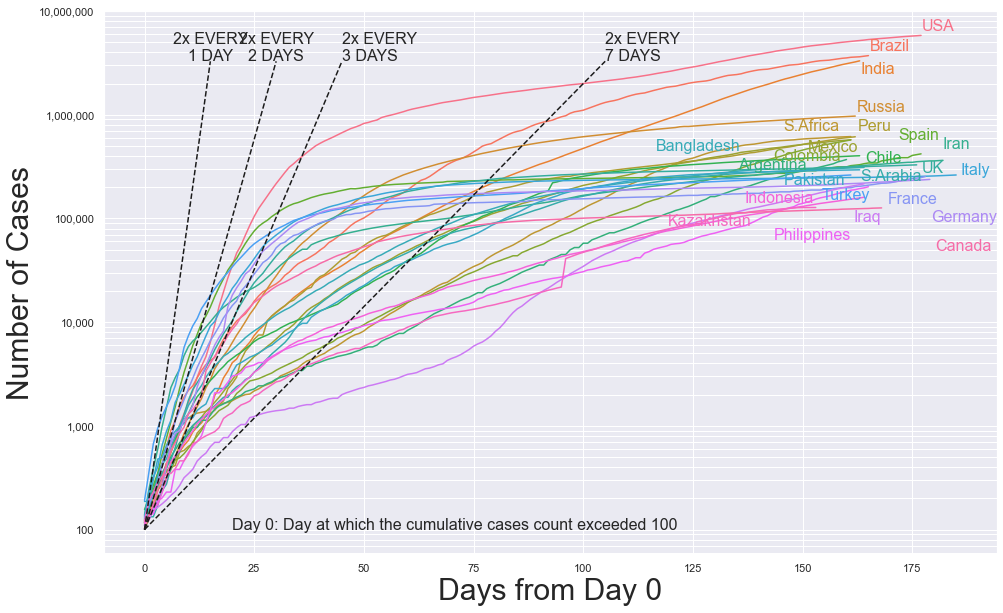

In [13]:
sns.set(rc={'figure.figsize':(16,10)}, font_scale = 1)
style = dict(size=10, color='gray')

ax = sns.lineplot(x="Days from 0", y="Cases", hue="Country", data=top_countries_covid, markers=True, hue_order=top_countries, legend=False)
ax.set_yscale('log')
plt.grid(True, which='both')
ax.plot(x1, y_1, 'k--')
ax.plot(x2, y_2, 'k--')
ax.plot(x3, y_3, 'k--')
ax.plot(x7, y_7, 'k--')
ax.set_xlabel("Days from Day 0",fontsize=30)
ax.set_ylabel("Number of Cases",fontsize=30)
ax.xaxis.set_major_formatter(ScalarFormatter())
ax.yaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
# plt.xlim([0, 150])
plt.text(20, 100, 'Day 0: Day at which the cumulative cases count exceeded {:.0f}'.format(K), fontsize=16)
plt.text(x1.max(), y_1.max(), '2x EVERY\n1 DAY', ha = 'center', fontsize=16)
plt.text(x2.max(), y_2.max(), '2x EVERY\n2 DAYS', ha = 'center', fontsize=16)
plt.text(x3.max(), y_3.max(), '2x EVERY\n3 DAYS', ha = 'left', fontsize=16)
plt.text(x7.max(), y_7.max(), '2x EVERY\n7 DAYS', ha = 'left', fontsize=16)
texts = [plt.text(max_cases.loc[str(country)]['Days from 0'], max_cases.loc[str(country)]['Cases'], str(country), fontsize=16, color=ax.get_lines()[top_countries.index(country)].get_c(), ha = 'center', va = 'center') for country in top_countries]
adjust_text(texts)

# plt.savefig('covid_b_cases_daily.png')

In [14]:
Average_infection_rate_per_1m = max_cases['Cases'].sum() / max_cases['Population'].sum() * 1000000
print("The average infection rate is: {:.1f} per 1m people".format(Average_infection_rate_per_1m))

Average_death_rate_per_1m = max_cases['Deaths'].sum() / max_cases['Population'].sum()* 1000000
print("The average death rate is: {:.1f} per 1m people".format(Average_death_rate_per_1m))

Average_mortality_per_cent_infected = max_cases['Deaths'].sum() / max_cases['Cases'].sum()*100
print("The average mortality rate is: {:.1f} per 100 people infected".format(Average_mortality_per_cent_infected))

The average infection rate is: 5538.8 per 1m people
The average death rate is: 194.0 per 1m people
The average mortality rate is: 3.5 per 100 people infected


# 3. Plot the daily cases moving averages

Plotting the daily cases is straight-forward. In most dashboards, they are plotted as bar
graphs. However, it is common with time-series data that fluctuations or noise obscures the
long-term trends or cycles. **Moving average** is a commonly used method that smooths
out short-term fluctuations and we will use this technique to plot the data in the dataframe
’covid top countries’ we already built with the cumulative cases.


Since we have the cumulative cases in the last df, we will calculate the moving slope
of the last 7 days **(back calc = 7) using the stats.linregress**, a statistical function from the
**SciPy** package.

## 10. We use a for loop to iterate through every country in the ’top countries’ and calculate the moving slope of the previous 7 days. The steps we follow are:

- Initialize the back window and the slope df with the columns we want to capture.
- Create the high level loop that filters one country at a time (one country data).
- Create the low level loop that iterates from the 7th to the last row of each country’s data:
        – creates the 7-day windows x and y
        – calls the stats.linregress to calculate: slope, intercept, R2, p-value and standard error
        – appends the slope, R2 and p-value to the ’slope df’ dataframe.

Notice that when we print the top 15 rows **(slope df.head(15))**, the first 6 rows contain
**NaN** values. This happens because the first slope is calculated with the first 7 rows
and the first result appears in the 7th row.

In [15]:
# back_calc IS THE BACK WINDOW THAT IS USED TO CALCULATE THE SLOPE
back_calc = 7
slope_df = pd.DataFrame(columns=['Country', 'Days from 0', 'Slope', 'R2', 'P_value'])

for country in top_countries:
    one_country_data = top_countries_covid[top_countries_covid['Country'] == str(country)].reset_index(drop=True)
#     one_country_data['log_cases'] = np.log10(one_country_data['Cases'])
    for i in np.arange(back_calc, len(one_country_data)+1):
        x = one_country_data.loc[i-back_calc: i, 'Days from 0'] # That is the 'Days_from_0'
        y = one_country_data.loc[i-back_calc: i, 'Cases'] # 
        slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
        one_country_data.loc[i-1, 'Slope'] = slope
        one_country_data.loc[i-1, 'R2'] = r_value * r_value
        one_country_data.loc[i-1, 'P_value'] = p_value
        one_country = one_country_data[['Country', 'Days from 0', 'Slope', 'R2', 'P_value']]
    
    slope_df = slope_df.append(one_country, ignore_index=False)
    
slope_df

,Country,Days from 0,Slope,R2,P_value
0,USA,0,NaN,NaN,NaN
1,USA,1,NaN,NaN,NaN
2,USA,2,NaN,NaN,NaN
3,USA,3,NaN,NaN,NaN
4,USA,4,NaN,NaN,NaN
...,...,...,...,...,...
164,Canada,164,386.72619,0.981761,0.000002
165,Canada,165,381.559524,0.985449,0.000001
166,Canada,166,402.571429,0.988159,0.000001
167,Canada,167,417.392857,0.989326,0.0


## 11. Set ’Countries’ as the index and save the file: covid b slope daily.xlsx

In [16]:
slope_df.set_index('Country', drop = False, inplace = True)
slope_df.to_excel('Covid_B_Slope_Daily.xlsx')

## 12. Create the df max slope with the maximum slope value per country and sort them in descending order. This way, we then filter appropriately to create the 4 dataframes data 1_5, data 6_10, data 11_15 and data 16_20 to plot them in the 4 subplots below.

In [17]:
slope_df.index.name = None
max_slope = slope_df.groupby(by=['Country']).max()
max_slope = max_slope.sort_values('Slope', ascending=False)
max_slope['Country'] = max_slope.index
# max_slope.index.name = None

max_slope
# slope_df

,Days from 0,Slope,R2,P_value,Country
Country,,,,,
USA,177,68400.226190,0.999628,0.001072,USA
India,163,67159.107143,0.999994,0.000396,India
Brazil,165,50420.785714,0.998226,0.000266,Brazil
S.Africa,161,12665.083333,0.999572,0.001309,S.Africa
Colombia,161,11625.559524,0.999782,0.000035,Colombia
Chile,163,11243.226190,0.999757,0.002052,Chile
Russia,162,10995.083333,0.999993,0.000149,Russia
Argentina,160,9711.392857,0.999450,0.000092,Argentina
Peru,162,8689.214286,0.999823,0.000905,Peru


In [18]:
data_1_5 = slope_df[slope_df.Country.isin(max_slope[:5]['Country'].tolist())]
data_1_5.reset_index(inplace = True)
data_1_5 = data_1_5.drop(columns = 'index')
Country_1_5 = max_slope[:5]['Country'].tolist()

data_6_10 = slope_df[slope_df.Country.isin(max_slope[5:10]['Country'].tolist())]
data_6_10.reset_index(inplace = True)
data_6_10 = data_6_10.drop(columns = 'index')
Country_6_10 = max_slope[5:10]['Country'].tolist()

data_11_15 = slope_df[slope_df.Country.isin(max_slope[10:15]['Country'].tolist())]
data_11_15.reset_index(inplace = True)
data_11_15 = data_11_15.drop(columns = 'index')
Country_11_15 = max_slope[10:15]['Country'].tolist()

data_16_20 = slope_df[slope_df.Country.isin(max_slope[15:20]['Country'].tolist())]
data_16_20.reset_index(inplace = True)
data_16_20 = data_16_20.drop(columns = 'index')
Country_16_20 = max_slope[15:20]['Country'].tolist()

## 13. Use Seaborn’s lineplot and plot the 4 dataframes with the top 20 countries in a 2×2 subplots image. Use the package adjust texts to annotate the lines and linear scale in y-axis.

(0.0, 200.0)

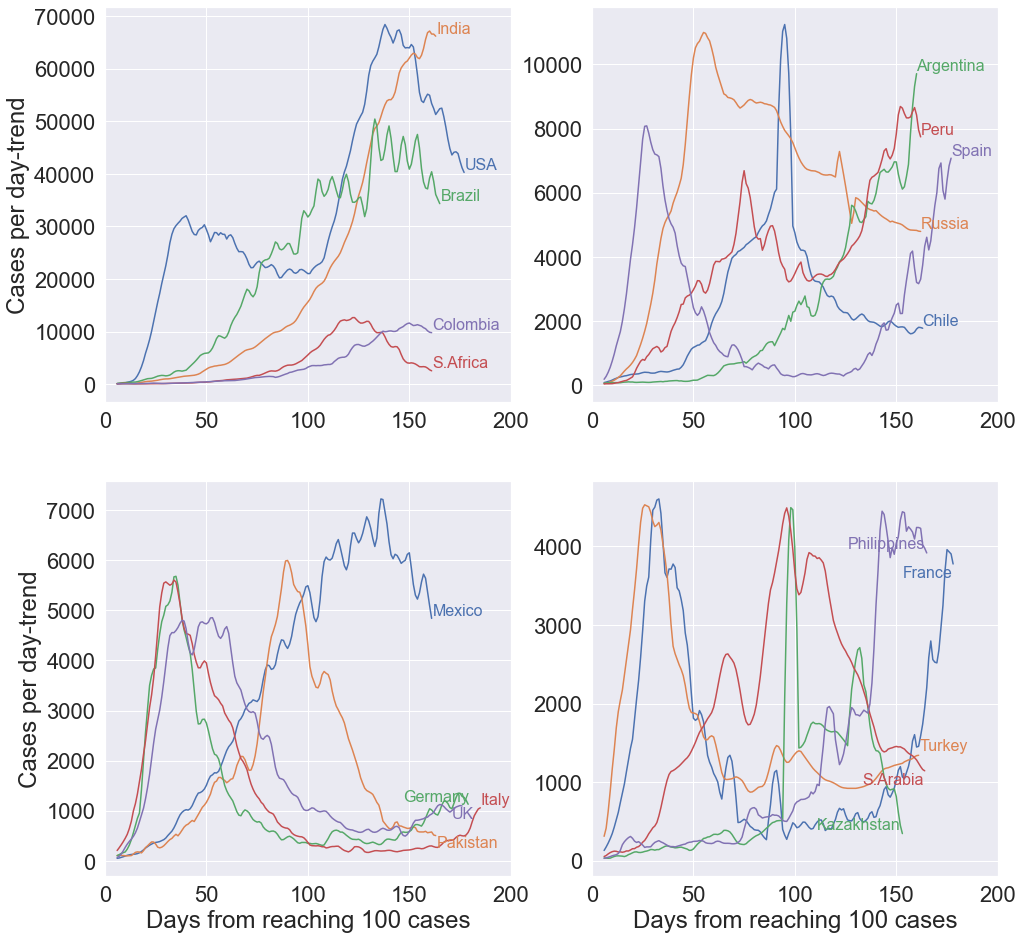

In [19]:
sns.set(rc={'figure.figsize':(16,16)}, font_scale = 2)
fig, axes = plt.subplots(2, 2)

sns.lineplot(x="Days from 0", y="Slope", hue="Country", data=data_1_5, markers=True, hue_order=Country_1_5, legend=False, ax=axes[0, 0])
texts = [axes[0, 0].text(max_cases.loc[str(country)]['Days from 0'], slope_df.loc[str(country)]['Slope'].iloc[-1], str(country), fontsize=16, color=axes[0, 0].get_lines()[Country_1_5.index(country)].get_c(), ha = 'left', va = 'center') for country in Country_1_5]
adjust_text(texts)
axes[0, 0].set_ylabel("Cases per day-trend",fontsize=24)

sns.lineplot(x="Days from 0", y="Slope", hue="Country", data=data_6_10, markers=True, hue_order=Country_6_10, legend=False, ax=axes[0, 1])
texts = [axes[0, 1].text(max_cases.loc[str(country)]['Days from 0'], slope_df.loc[str(country)]['Slope'].iloc[-1], str(country), fontsize=16, color=axes[0, 1].get_lines()[Country_6_10.index(country)].get_c(), ha = 'left', va = 'top') for country in Country_6_10]
adjust_text(texts)

sns.lineplot(x="Days from 0", y="Slope", hue="Country", data=data_11_15, markers=True, hue_order=Country_11_15, legend=False, ax=axes[1, 0])
texts = [axes[1, 0].text(max_cases.loc[str(country)]['Days from 0'], slope_df.loc[str(country)]['Slope'].iloc[-1], str(country), fontsize=16, color=axes[1, 0].get_lines()[Country_11_15.index(country)].get_c(), ha = 'left', va = 'center') for country in Country_11_15]
adjust_text(texts)
axes[1, 0].set_ylabel("Cases per day-trend",fontsize=24)
axes[1, 0].set_xlabel("Days from reaching 100 cases",fontsize=24)

sns.lineplot(x="Days from 0", y="Slope", hue="Country", data=data_16_20, markers=True, hue_order=Country_16_20, legend=False, ax=axes[1, 1])
texts = [axes[1, 1].text(max_cases.loc[str(country)]['Days from 0'], slope_df.loc[str(country)]['Slope'].iloc[-1], str(country), fontsize=16, color=axes[1, 1].get_lines()[Country_16_20.index(country)].get_c(), ha = 'left', va = 'center') for country in Country_16_20]
adjust_text(texts)
axes[1, 1].set_xlabel("Days from reaching 100 cases",fontsize=24)

axes[0, 1].set_ylabel("",fontsize=24)
axes[1, 1].set_ylabel("",fontsize=24)
axes[0, 0].set_xlabel("",fontsize=24)
axes[0, 1].set_xlabel("",fontsize=24)
axes[0, 1].set_xlim([0, 200])
axes[1, 1].set_xlim([0, 200])
axes[0, 0].set_xlim([0, 200])
axes[1, 0].set_xlim([0, 200])
# axes[0, 0].set_yscale('log')
# axes[0, 1].set_yscale('log')
# axes[1, 0].set_yscale('log')
# axes[1, 1].set_yscale('log')

# plt.savefig('covid_b_Infection_rate_profile.png')